### Student Information
Name: 林孮瑋

Student ID: 110062665

GitHub ID: JohnnyLin97

Kaggle name: Johnny

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

# Take home exercises

### 1.1 Data preparation

In [32]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)


### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()


# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)


print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ***Exercise 1***  
Plot word frequency for Top 30 words in both train and test dataset.

1. Using nltk to do tokenize
2. Deleting stopwords and punctuations
3. Counting frequency with nltk

<BarContainer object of 30 artists>

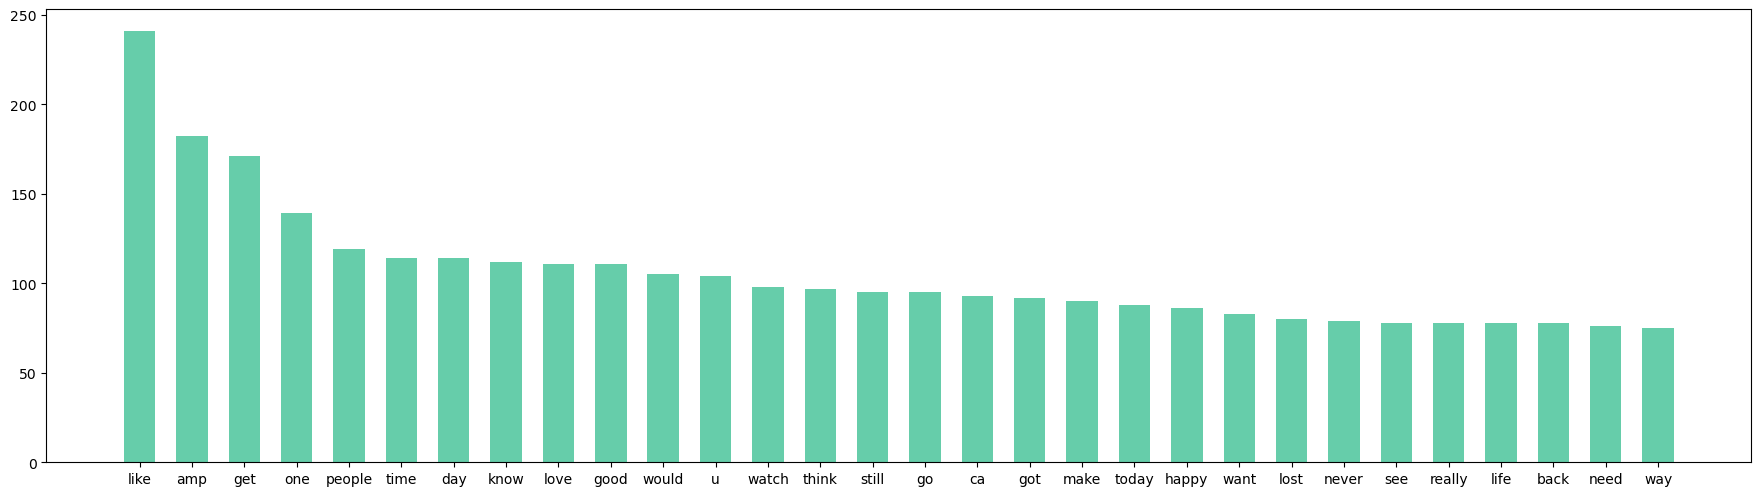

In [84]:
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))

text_train = train_df['text']
words_train = []

 # do tokenize and filter stopwords
for i in text_train:
    words = nltk.tokenize.word_tokenize(i)

    words = [word.lower() for word in words if word.isalpha()]

    for j in words:
        if j not in stop_words:
            words_train.append(j)

# count frequency
freq_train = nltk.FreqDist(words_train)
freq_train = sorted(freq_train.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
freq_train = freq_train[:30]

key = []
value = []

for k in freq_train:
    key.append(k[0])
    value.append(k[1])

plt.figure(figsize=(22,6), dpi=100)
plt.bar(key, value, width=0.6, color='MediumAquaMarine') 



<BarContainer object of 30 artists>

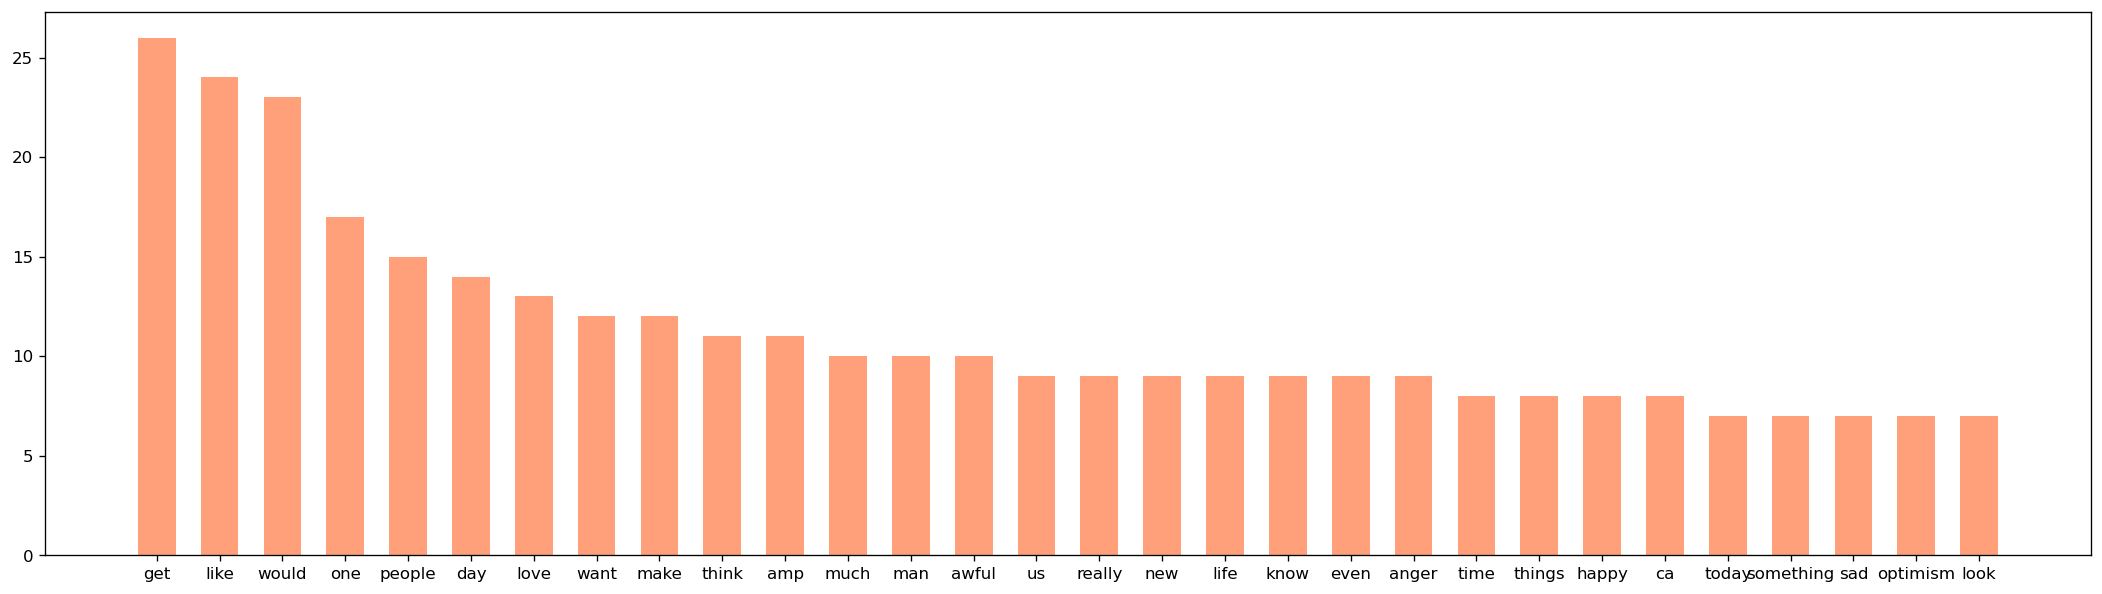

In [85]:
stop_words = set(stopwords.words('english'))

text_test = test_df['text']
words_test = []

for i in text_test:
    words = nltk.tokenize.word_tokenize(i)

    words = [word.lower() for word in words if word.isalpha()]

    for j in words:
        if j not in stop_words:
            words_test.append(j)

freq_test = nltk.FreqDist(words_test)
freq_test = sorted(freq_test.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
freq_test = freq_test[:30]

key = []
value = []

for k in freq_test:
    key.append(k[0])
    value.append(k[1])

plt.figure(figsize=(22,6), dpi=120)
plt.bar(key, value, width=0.6, color='LightSalmon') 

-----------------------------------------------------------------------

### 1.2 Save data

In [90]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

### 2 Feature engineering

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

# add .toarray() to show
train_data_BOW_features.toarray()

# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()

-------------------
### ***Exercise 2***  
Generate an embedding using the TF-IDF vectorizer with 1000 features and show the feature names for features [100:110].

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 1000, tokenizer = nltk.word_tokenize) 

tfidf.fit(train_df['text'])
train_tfidf = tfidf.transform(train_df['text'])

# check feature names
feature_name = tfidf.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

-------------------------------

# Kaggle competition